# Titanic Exploratory Data Analysis

The challenge: Find a model to predict which passengers on the titanic survived.

In this notebook, we will perform exploratory analysis to answer the following questions:

1. What are the passenger demographics?
2. Who was with family and who was alone?
3. How do passenger features affect survival rates?

Later, we will look at different predictive models and see how well they perform.

The kaggle challenge can be found here:
https://www.kaggle.com/c/titanic-gettingStarted

The exploratory analysis and modelling use the training data [train.csv](https://www.kaggle.com/c/titanic/download/train.csv)  and test data [test.csv](.csv (27.96 kb).

In [36]:
# Required modules
from __future__ import division

import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

In [37]:
# Import and preview the data
titanic_df = pd.read_csv('data/train.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## What are the passenger demographics?

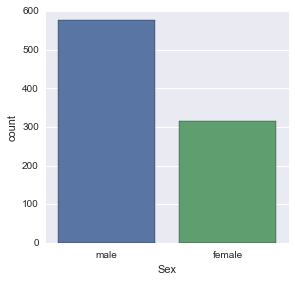

In [38]:
# Breakdown by gender
sns.factorplot('Sex', data=titanic_df, kind='count')

We see that there are about 300 more males than females.

What about the class of each sex?

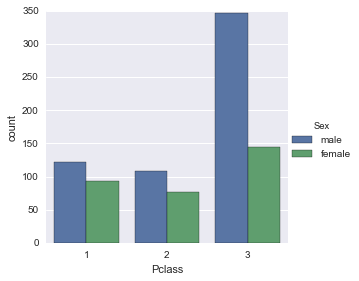

In [39]:
# Now separate genders by class
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='Sex')

It appears that the surplus of males comes from 3rd class. The axiom "Women and children first!" can be investigated by dividing passengers into three groups: Men, women and children.

In [40]:
# Let's distinguish between male, female, and child
# We'll define a child to be someone under 16 years old
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

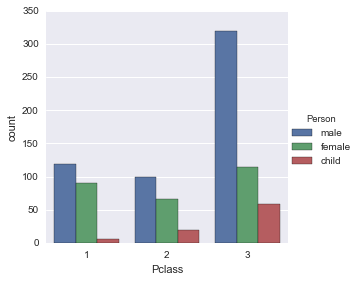

In [41]:
# Let's separate type of person by class
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='Person')

It's clear from the above plot that most of the children are in 3rd class.

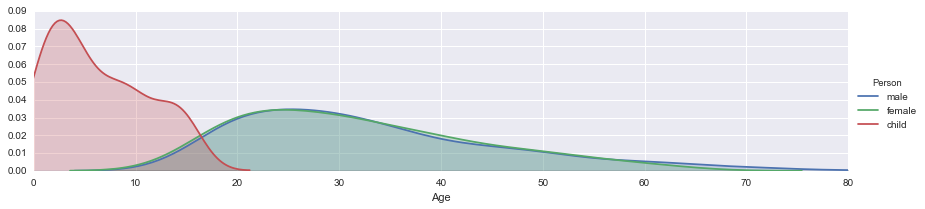

In [42]:
# Let's see how the age of each person type is distributed
# Create a ked plot for each type of person on a FacetGrid
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

The children have a peak at very young, only a few years old. Men and women average at about 30 years old.

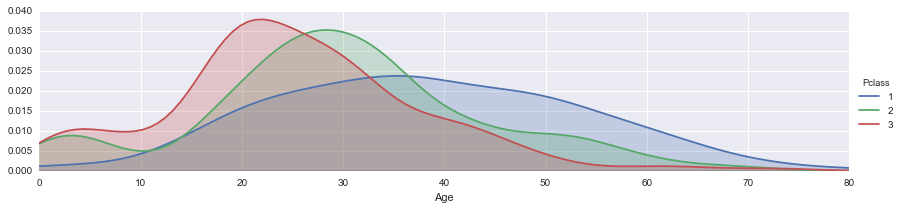

In [43]:
# We can do the same for class
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

The mean for each class are distinct, where higher class is associated with increased age, although the spread of first class seems larger than the other two.

## Who was with family and who was alone?

In [44]:
# Let's create a column which flags if the passenger is alone
titanic_df['Alone'] = 0
titanic_df['Alone'].loc[titanic_df['SibSp'] + titanic_df['Parch'] == 0] = 1

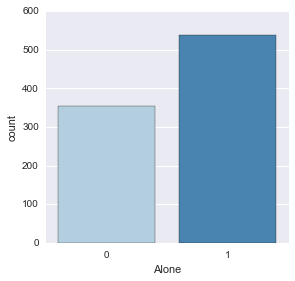

In [45]:
sns.factorplot('Alone', data=titanic_df, kind='count', palette='Blues')

We see that the majority of passengers are travelling alone.

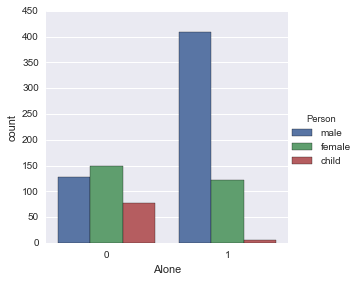

In [46]:
# Let's separate these passengers by type of person
sns.factorplot('Alone', data=titanic_df, kind='count', hue='Person')

Almost all children are with family, women are approximately equally distributed, and the majority of men are travelling alone.

## How do features affect survival rates?

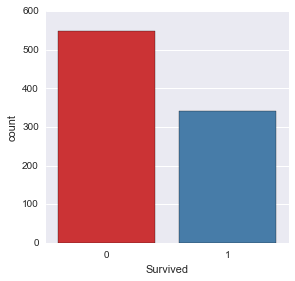

In [47]:
# First, get an overview of how many survived
sns.factorplot('Survived', data=titanic_df, palette='Set1', kind='count')

We see that the majority of passengers did not survive. How does survival look when we break down by sex?

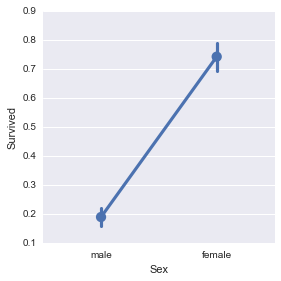

In [48]:
# Survival by sex
sns.factorplot('Sex', 'Survived', data=titanic_df)

So women had a much higher rate of survival. 

Let's check if the class of the passenger affected the survival rate.

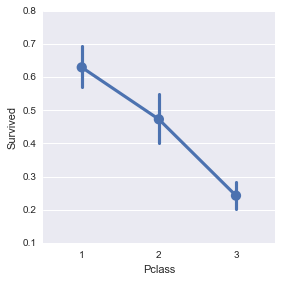

In [49]:
sns.factorplot('Pclass', 'Survived', data=titanic_df)

It is clear that the lower classes were much likelier to perish than the 1st class passengers, especially the 3rd class. Recall that there were significantly more men than women in the 3rd class, so it could simply be due to the women and children first policy.

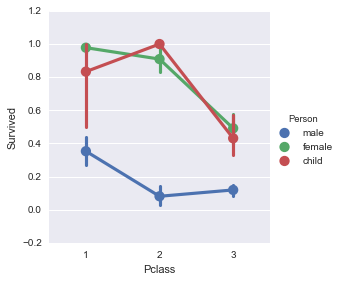

In [50]:
# Let's breakdown by class and type of person
sns.factorplot('Pclass', 'Survived', hue='Person', data=titanic_df)

This plot tells us that being in 3rd class lowers survival rate regardless of being a man, woman or child. Being a man regardless of class significantly decreases the chance of survival.
Next let's investigate the effect of fare paid on survival.

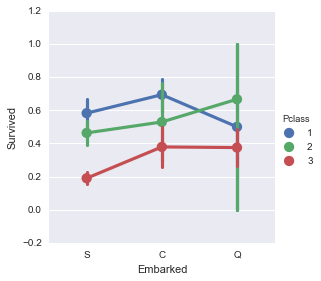

In [51]:
# Alone
sns.factorplot('Embarked', 'Survived', hue='Pclass', data=titanic_df)

Finally, let's investigate how age affects survival.

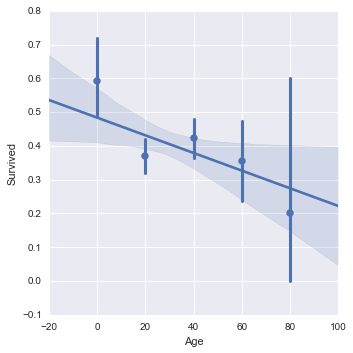

In [52]:
# Create a linear plot on age vs. survival
generations=[0,20,40,60,80]
sns.lmplot('Age', 'Survived', data=titanic_df, x_bins=generations)

Looks like survival rates decrease with age.

What if break this into males and females?

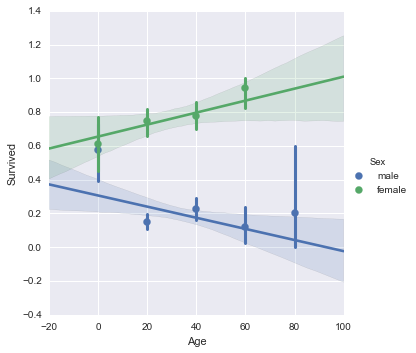

In [53]:
# Break down by sex
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, x_bins=generations)

Interesting to see that older women are more likely to survive, while the opposite is true for men (note that the large deviation in 80+ year old men occurs because there is only a single data point).